In [21]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

RANDOM_SEED = 42

# Specify each path

In [22]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [23]:
NUM_CLASSES = 26

# Dataset reading

In [24]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [25]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [26]:
# Normalize the dataset
X_dataset = X_dataset / np.max(X_dataset)

# K-Fold Cross Validation

In [27]:
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_SEED)

In [28]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((21 * 2,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True, verbose=1)

In [29]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

Fold 1/5
Epoch 1/1000
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1729 - loss: 2.7539 - val_accuracy: 0.7993 - val_loss: 0.8833
Epoch 2/1000
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5984 - loss: 1.0559 - val_accuracy: 0.9285 - val_loss: 0.4354
Epoch 3/1000
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7249 - loss: 0.7610 - val_accuracy: 0.9542 - val_loss: 0.2749
Epoch 4/1000
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7893 - loss: 0.6037 - val_accuracy: 0.9605 - val_loss: 0.2201
Epoch 5/1000
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8200 - loss: 0.5228 - val_accuracy: 0.9659 - val_loss: 0.1831
Epoch 6/1000
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8401 - loss: 0.4787 - val_accuracy: 0.9730 - val_loss: 0.1515
Epoch 7/1000
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8608 - loss: 0.4186 - val_accuracy: 0.9741 - val_loss: 0.1397
Epoch 8/1000
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8698 - loss: 

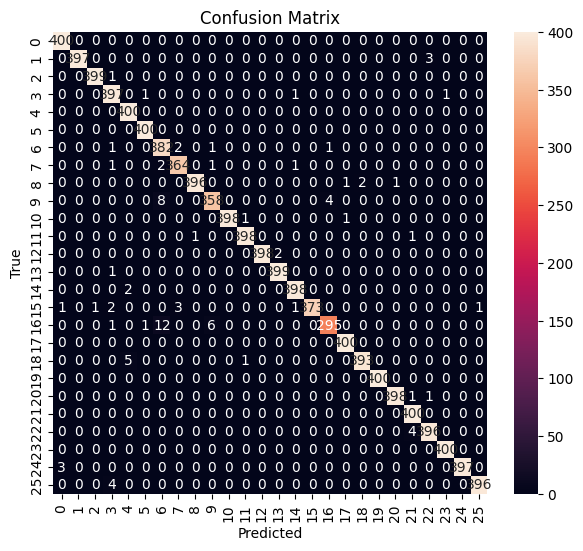

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       400
           1       1.00      0.99      1.00       400
           2       1.00      1.00      1.00       400
           3       0.97      0.99      0.98       400
           4       0.98      1.00      0.99       400
           5       1.00      1.00      1.00       400
           6       0.95      0.99      0.97       387
           7       0.99      0.99      0.99       369
           8       1.00      0.99      0.99       400
           9       0.98      0.97      0.97       370
          10       1.00      0.99      1.00       400
          11       0.99      0.99      0.99       400
          12       1.00      0.99      1.00       400
          13       1.00      1.00      1.00       400
          14       0.99      0.99      0.99       400
          15       1.00      0.98      0.99       382
          16       0.98      0.94      0.96       315
     

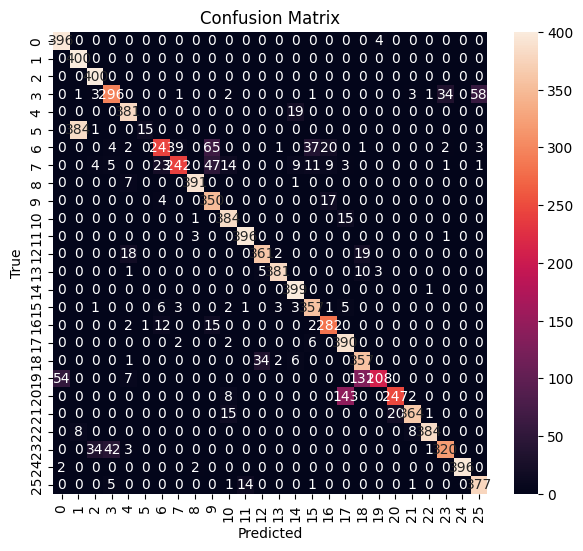

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       400
           1       0.50      1.00      0.67       400
           2       0.90      1.00      0.95       400
           3       0.84      0.74      0.79       400
           4       0.90      0.95      0.93       400
           5       0.94      0.04      0.07       400
           6       0.84      0.63      0.72       387
           7       0.94      0.66      0.77       369
           8       0.98      0.98      0.98       399
           9       0.73      0.94      0.83       371
          10       0.90      0.96      0.93       400
          11       0.96      0.99      0.98       400
          12       0.90      0.90      0.90       400
          13       0.98      0.95      0.97       400
          14       0.91      1.00      0.95       400
          15       0.86      0.93      0.90       382
          16       0.86      0.90      0.88       314
     

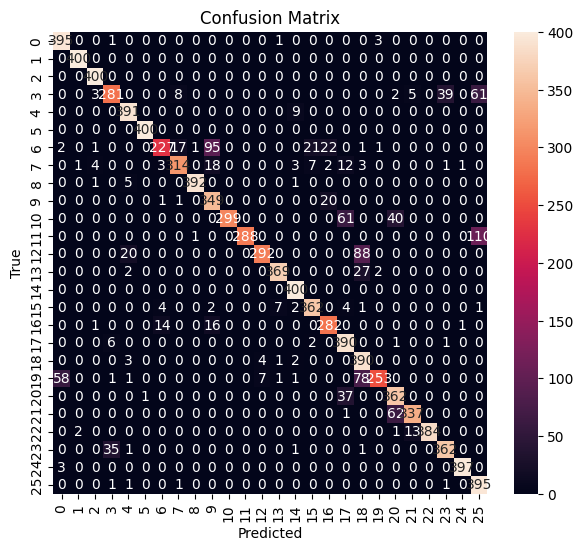

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       400
           1       0.99      1.00      1.00       400
           2       0.98      1.00      0.99       400
           3       0.86      0.70      0.78       399
           4       0.92      0.98      0.95       400
           5       1.00      1.00      1.00       400
           6       0.91      0.59      0.71       388
           7       0.92      0.85      0.88       369
           8       0.99      0.98      0.99       399
           9       0.73      0.94      0.82       371
          10       1.00      0.75      0.86       400
          11       1.00      0.72      0.84       399
          12       0.96      0.73      0.83       400
          13       0.97      0.92      0.95       400
          14       0.95      1.00      0.98       400
          15       0.92      0.95      0.93       383
          16       0.87      0.90      0.88       314
     

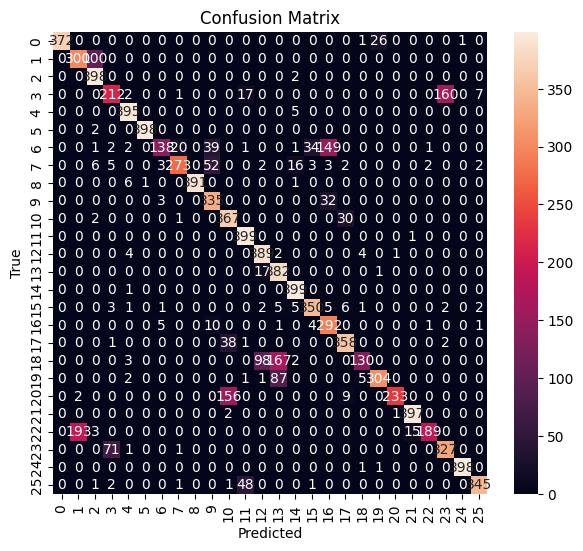

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       400
           1       0.61      0.75      0.67       400
           2       0.78      0.99      0.87       400
           3       0.72      0.53      0.61       399
           4       0.95      0.99      0.97       400
           5       1.00      0.99      1.00       400
           6       0.92      0.36      0.51       388
           7       0.92      0.74      0.82       369
           8       1.00      0.98      0.99       399
           9       0.77      0.91      0.83       370
          10       0.65      0.92      0.76       400
          11       0.85      1.00      0.92       400
          12       0.76      0.97      0.86       400
          13       0.59      0.95      0.73       400
          14       0.93      1.00      0.96       400
          15       0.89      0.91      0.90       383
          16       0.61      0.93      0.73       314
     

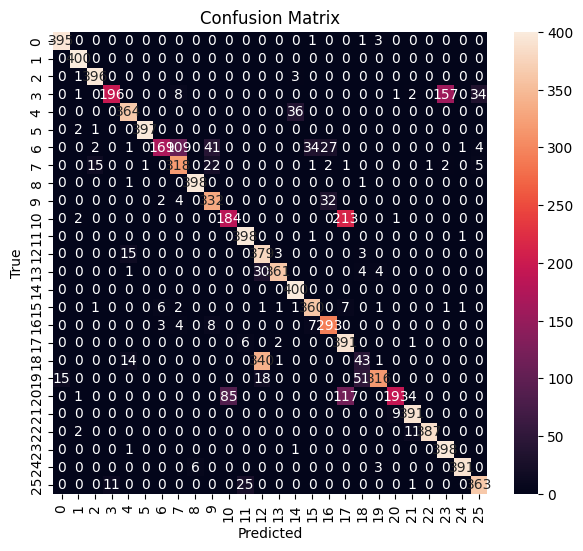

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       400
           1       0.98      1.00      0.99       400
           2       0.95      0.99      0.97       400
           3       0.95      0.49      0.65       399
           4       0.92      0.91      0.91       400
           5       1.00      0.99      0.99       400
           6       0.94      0.44      0.60       388
           7       0.71      0.86      0.78       368
           8       0.99      0.99      0.99       400
           9       0.82      0.90      0.86       370
          10       0.68      0.46      0.55       400
          11       0.93      0.99      0.96       400
          12       0.49      0.95      0.65       400
          13       0.98      0.90      0.94       400
          14       0.91      1.00      0.95       400
          15       0.89      0.94      0.92       382
          16       0.83      0.93      0.88       315
     

In [30]:
val_losses = []
val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_dataset, y_dataset)):
    print(f"Fold {fold + 1}/{k}")
    
    X_train, X_val = X_dataset[train_index], X_dataset[val_index]
    y_train, y_val = y_dataset[train_index], y_dataset[val_index]

    model = build_model()

    # Train the model
    model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_val, y_val), callbacks=[es_callback], verbose=1)

    # Evaluate the model
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

    # Predict and print confusion matrix and classification report for each fold
    y_pred = np.argmax(model.predict(X_val), axis=1)
    print_confusion_matrix(y_val, y_pred, report=True)

# Print average performance
print(f"\nAverage Validation Loss: {np.mean(val_losses)}")
print(f"Average Validation Accuracy: {np.mean(val_accuracies)}")

# Model building

In [31]:
# Final model training on the entire dataset
final_model = build_model()

In [32]:
final_model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_7           │ (None, 42)             │           168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 26)             │           442 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,970 (23.32 KB)

 Trainable params: 5,886 (22.99 KB)

 Non-trainable params: 84 (336.00 B)

In [33]:

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

# Model training

In [34]:
final_model.fit(
    X_dataset,
    y_dataset,
    epochs=1000,
    batch_size=128,
    callbacks=[es_callback],
    verbose = 1
)

Epoch 1/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1960 - loss: 2.6122
Epoch 2/1000
146/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6387 - loss: 0.9813

c:\Users\newyo\Desktop\Senior-Project\venv\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6666 - loss: 0.9065
Epoch 3/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7728 - loss: 0.6466
Epoch 4/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8122 - loss: 0.5499
Epoch 5/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8377 - loss: 0.4815
Epoch 6/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8581 - loss: 0.4213
Epoch 7/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8817 - loss: 0.3685
Epoch 8/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8859 - loss: 0.3611
Epoch 9/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8967 - loss: 0.3271
Epoch 10/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9044 - loss: 0.3009
Epoch 11/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9090 - loss: 0.2883
Epoch 12/1000
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9164 - loss: 0.2739
Epoch 13/1000
400/400 ━━━━━━━━━━━━━━━━━━━━

In [35]:
# Loading the saved model for inference
loaded_model = tf.keras.models.load_model(model_save_path)

# Inference test
predict_result = loaded_model.predict(np.array([X_dataset[0]]))
print("Prediction Result:", np.squeeze(predict_result))
print("Predicted Class:", np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction Result: [9.9999857e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1020967e-26
 0.0000000e+00 6.0441764e-12 1.0646685e-21 1.8903407e-12 4.3144283e-10
 1.9981755e-19 9.5832234e-19 1.5286421e-15 1.4739103e-15 2.8475276e-36
 1.7392522e-07 1.1378410e-06 2.1129054e-24 1.6878006e-27 2.3460327e-13
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6921482e-32 1.0510405e-07
 1.9048342e-33]
Predicted Class: 0


# Convert to model for Tensorflow-Lite

In [36]:
# Save as a model dedicated to inference
final_model.save(model_save_path, include_optimizer=False)

In [37]:
# Transform model (quantization) to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the TFLite model
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\newyo\AppData\Local\Temp\tmpjo1xsexl\assets


INFO:tensorflow:Assets written to: C:\Users\newyo\AppData\Local\Temp\tmpjo1xsexl\assets


Saved artifact at 'C:\Users\newyo\AppData\Local\Temp\tmpjo1xsexl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_24')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  1892621805776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892677694240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892621798384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892621807184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892677108480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892471699616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892851945136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892851942320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892851943024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892851949360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  18928516445

# Inference test

In [38]:
# TFLite inference test
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [39]:
# Get I/O tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [40]:
# Set input tensor
interpreter.set_tensor(input_details[0]['index'], np.array([X_dataset[0]]))

In [41]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [42]:
print("TFLite Prediction Result:", np.squeeze(tflite_results))
print("TFLite Predicted Class:", np.argmax(np.squeeze(tflite_results)))

TFLite Prediction Result: [9.9999905e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6623888e-27
 0.0000000e+00 1.5037520e-12 1.4577738e-22 8.7152258e-13 2.0862663e-10
 3.6749544e-20 1.4048472e-19 3.6653572e-16 1.8875127e-16 2.8074793e-37
 9.8848275e-08 7.1429361e-07 3.2703469e-25 1.8044086e-28 6.9390294e-14
 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.1474947e-34 6.7492159e-08
 4.7123126e-35]
TFLite Predicted Class: 0
